In [1]:
import pandas as pd
import numpy as np
import glob
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = "C:\\Dataframes\\Oracle\\files" # your path with double backslashes 
all_files = glob.glob(path + "/*.csv")

li = [pd.read_csv(filename, index_col=None, header=0) for filename in all_files]

df = pd.concat(li, axis=0, ignore_index=True)

In [3]:
# Sathyam
df = df[df['theatre_id'] == '18d56148-93d5-4be6-9172-640ee9607d96'].reset_index(drop=True) 

In [4]:
ref = df
df = df[['time', 'date', 'release_date', 'total_seats', 'sold_seats']]

In [5]:
df.drop('total_seats', axis=1, inplace=True)

In [6]:
from datetime import date

def day_of_week(dt):
    
    ymd = dt.split('T')[0].split('-')
    y, m, d = ymd[0], ymd[1].lstrip('0'), ymd[2].lstrip('0')
    y, m, d = int(y), int(m), int(d)
    return date(y, m, d).weekday()

df['day_of_week'] = df['time'].apply(day_of_week)

In [7]:
def time_of_day(time):
    hour = time.split('T')[1][:2]
    if hour[0] == '0':
        hour = int(hour[1])
    else:
        hour = int(hour)
    
    if hour < 13:
        return 'Morning'
    elif hour < 17:
        return 'Afternoon'
    elif hour < 20:
        return 'Evening'
    elif hour <= 23:
        return 'Night'

df['time_of_day'] = df['time'].apply(time_of_day)

In [8]:
df['time'] = df['time'].apply(lambda x: x.split('T')[1][:5])

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
avg_sold = [df[df['day_of_week'] == day]['sold_seats'].mean() for day in df['day_of_week'].unique()]

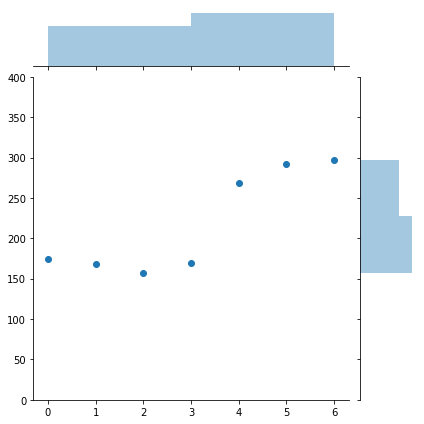

In [11]:
sns.jointplot(x=df['day_of_week'].unique(),y=avg_sold,ylim=(0,400))

In [12]:
df['hour'] = df['time'].apply(lambda x: int(x[:2]))

In [13]:
avg_sold = [df[df['hour'] == hour]['sold_seats'].mean() for hour in sorted(df['hour'].unique())]

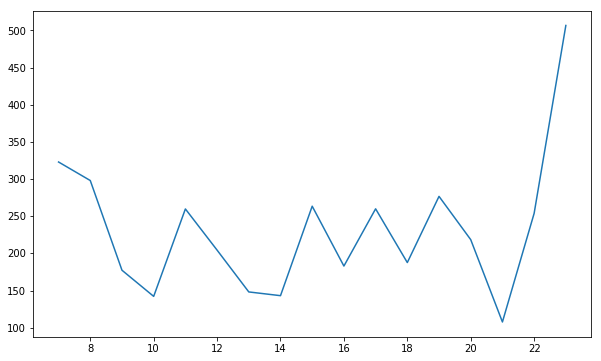

In [14]:
plt.figure(figsize=(10,6))
sns.lineplot(x=sorted(df['hour'].unique()),y=avg_sold)

In [15]:
df.head()

,time,date,release_date,sold_seats,day_of_week,time_of_day,hour
0,22:00,2018-03-04,2018-03-02,62,6,Night,22
1,19:20,2018-03-04,2018-02-23,109,6,Evening,19
2,21:50,2018-03-04,2018-03-02,99,6,Night,21
3,22:00,2018-03-04,2018-02-09,62,6,Night,22
4,22:20,2018-03-04,2018-02-23,303,6,Night,22


In [ ]:
#error

from datetime import datetime

df['date'] = df['date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
df['release_date'] = df['release_date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

df['since_release'] = [(df['date'][i] - df['release_date'][i]).days for i in range(len(df))]